## Movie Recommendation System 📽️

#### Final Project in CCS 230 - Data Mining 🗃️

**1. About the Dataset** ✔️

The dataset used is from Movielens that contains movies, users, and ratings (3 separate .dat files).

> **Movies**
>
> **Content**
>
> The dataset is a collection of movies, each identified by a unique ID, title, release year, and genre classification. The dataset appears to serve as a catalog of films, spanning multiple genres like action, drama, comedy, thriller, sci-fi, animation, and more.
>
> **Context**
>
> Used for various analytical purposes such as exploring trends in movie genres over time, filtering movies by specific characteristics, or studying patterns in film production.

> **Users**
>
> **Content**
>
> Includes user-related information. Each row appears to represent a different user and includes attributes such as: User ID, Gender, Age, user preferences, location, ZIP code, etc.
>
> **Context**
>
> Useful for analyzing user demographics, studying audience preferences, or understanding patterns in user behavior.

> **Ratings**
>
> **Content**
>
> Consists of user ratings for different movies. Each row in the dataset typically includes: **user ID**, **movie ID**, **rating score**, and **timestamp**.
>
>
> **Context**
>
> Practical in analyzing user preferences and movie popularity. This dataset could be used for building recommendation systems, identifying trends in movie ratings over time, and understanding how different demographics respond to various genres.

In [ ]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# import dataset
movies = pd.read_csv('movies.dat', sep='::', engine='python',
                         names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
ratings = pd.read_csv('ratings.dat', sep='::', engine='python',
                          names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')
users = pd.read_csv('users.dat', sep='::', engine='python',
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='latin-1')


In [5]:
print(f"shape: {movies.shape}")
movies.head()

shape: (3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print(f"shape: {users.shape}")
users.head()

shape: (6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
print(f"shape: {ratings.shape}")
ratings.head()

shape: (1000209, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


**2. Overview of Dataset** ✔️

In [8]:
df1 = pd.DataFrame(movies)
df1

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [9]:
df2 = pd.DataFrame(users)
df2

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [10]:
df3 = pd.DataFrame(ratings)
df3

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


*explanation* ❎

**3. Preparing Dataset** ✔️

In [14]:
# Check missing value
df1.isnull().sum().to_frame('NaN value').T

,MovieID,Title,Genres
NaN value,0,0,0


In [15]:
df2.isnull().sum().to_frame('NaN value').T

,UserID,Gender,Age,Occupation,Zip-code
NaN value,0,0,0,0,0


In [16]:
df3.isnull().sum().to_frame('NaN value').T

,UserID,MovieID,Rating,Timestamp
NaN value,0,0,0,0


In [17]:
# check count of unique values in each columns
for col in df1:
    print(f"{col}: {df1[col].nunique()}")

MovieID: 3883
Title: 3883
Genres: 301


In [18]:
for col in df2:
    print(f"{col}: {df2[col].nunique()}")

UserID: 6040
Gender: 2
Age: 7
Occupation: 21
Zip-code: 3439


In [19]:
for col in df3:
    print(f"{col}: {df3[col].nunique()}")

UserID: 6040
MovieID: 3706
Rating: 5
Timestamp: 458455


In [20]:
# more details
df1.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
MovieID,3883.0,1986.049446,1146.778349,1.0,982.5,2010.0,2980.5,3952.0


In [21]:
df2.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
UserID,6040.0,3020.500000,1743.742145,1.0,1510.75,3020.5,4530.25,6040.0
Age,6040.0,30.639238,12.895962,1.0,25.00,25.0,35.00,56.0
Occupation,6040.0,8.146854,6.329511,0.0,3.00,7.0,14.00,20.0


In [22]:
df3.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09


In [23]:
df1.describe(include=[object]).T

,count,unique,top,freq
Title,3883,3883,Toy Story (1995),1
Genres,3883,301,Drama,843


In [24]:
df2.describe(include=[object]).T

,count,unique,top,freq
Gender,6040,2,M,4331
Zip-code,6040,3439,48104,19


*explanation* ❎

In [25]:
movies.drop('MovieID', axis=1, inplace=True)

In [26]:
ratings.drop(['UserID'], axis=1, inplace=True)

In [27]:
users.drop('UserID', axis=1, inplace=True)

In [28]:
# gender encoding
users['Gender'] = users['Gender'].replace(['Male', 'Female'], [0, 1])

# occupation encoding
users['Occupation'] = users['Occupation'].astype('category').cat.codes

In [29]:
# extract year from title if present
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)').astype(float)

# split genres into dummy variables
genres_split = movies['Genres'].str.get_dummies(sep='|')
movies = pd.concat([movies, genres_split], axis=1)

*explanation* ❎

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [33]:
df1.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [34]:
df2.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [35]:
df3.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

**4. Exploratory Data Analysis (EDA)**

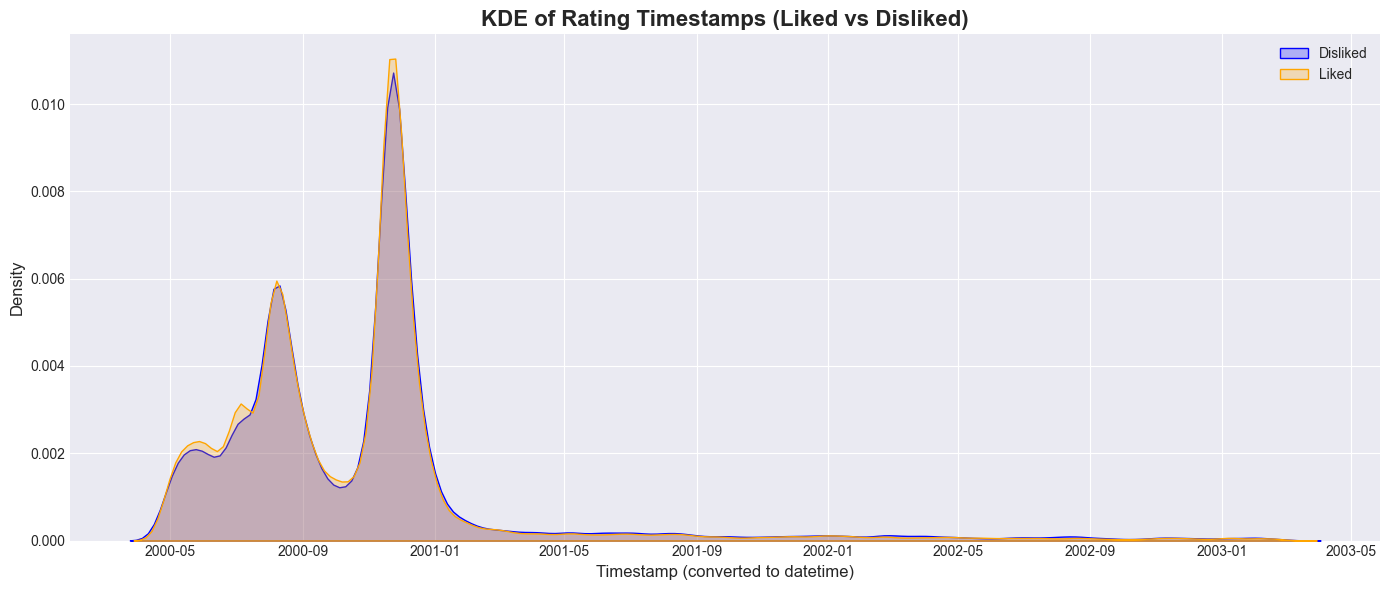

In [36]:
# Convert timestamp and create 'Liked' column
ratings['Datetime'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Liked'] = ratings['Rating'] >= 4

# Set style and figure size
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 6))  # make the plot wider

# KDE plots with distinct colors
sns.kdeplot(
    ratings.loc[ratings['Liked'] == False, 'Datetime'],
    label='Disliked',
    shade=True,
    color='blue'
)
sns.kdeplot(
    ratings.loc[ratings['Liked'] == True, 'Datetime'],
    label='Liked',
    shade=True,
    color='orange'
)

# Title and labels
plt.title('KDE of Rating Timestamps (Liked vs Disliked)', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp (converted to datetime)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

*explanation* ❎

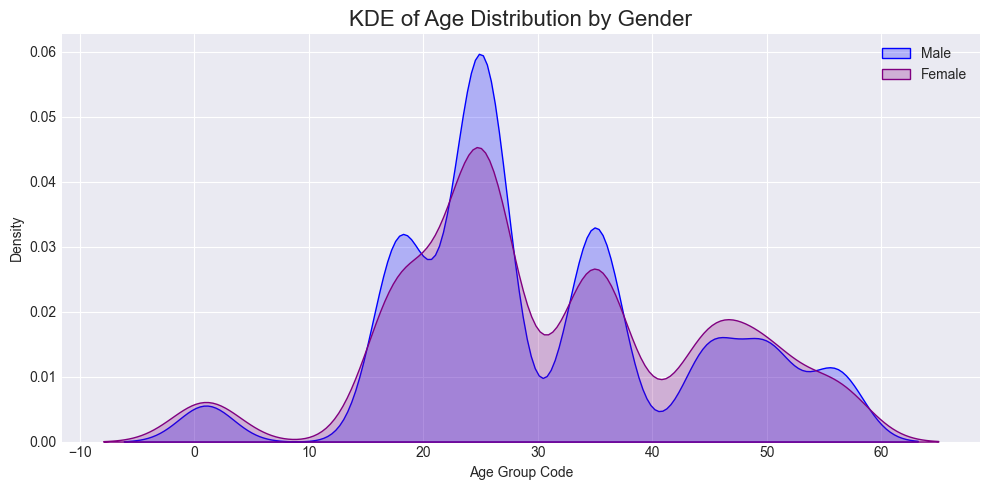

In [37]:
plt.figure(figsize=(10, 5))
sns.kdeplot(users.loc[users['Gender'] == 'M', 'Age'], label='Male', shade=True, color='blue')
sns.kdeplot(users.loc[users['Gender'] == 'F', 'Age'], label='Female', shade=True, color='purple')

plt.title('KDE of Age Distribution by Gender', fontsize=16)
plt.xlabel('Age Group Code')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

*explanation* ❎

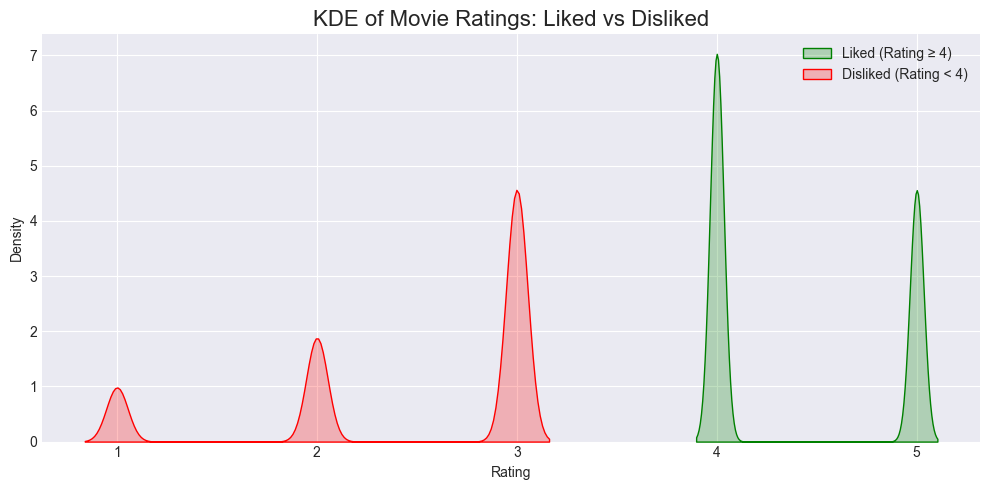

In [38]:
# Define "Liked" as ratings >= 4
ratings['Liked'] = ratings['Rating'] >= 4

plt.figure(figsize=(10, 5))
sns.kdeplot(ratings.loc[ratings['Liked'] == True, 'Rating'], label='Liked (Rating ≥ 4)', shade=True, color='green')
sns.kdeplot(ratings.loc[ratings['Liked'] == False, 'Rating'], label='Disliked (Rating < 4)', shade=True, color='red')

plt.title('KDE of Movie Ratings: Liked vs Disliked', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.tight_layout()
plt.show()

*explanation* ❎

**4.1 Univariate Analysis** ✔️

In [39]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MovieID,3883.0,1986.049446,1146.778349,1.0,982.5,2010.0,2980.5,3952.0


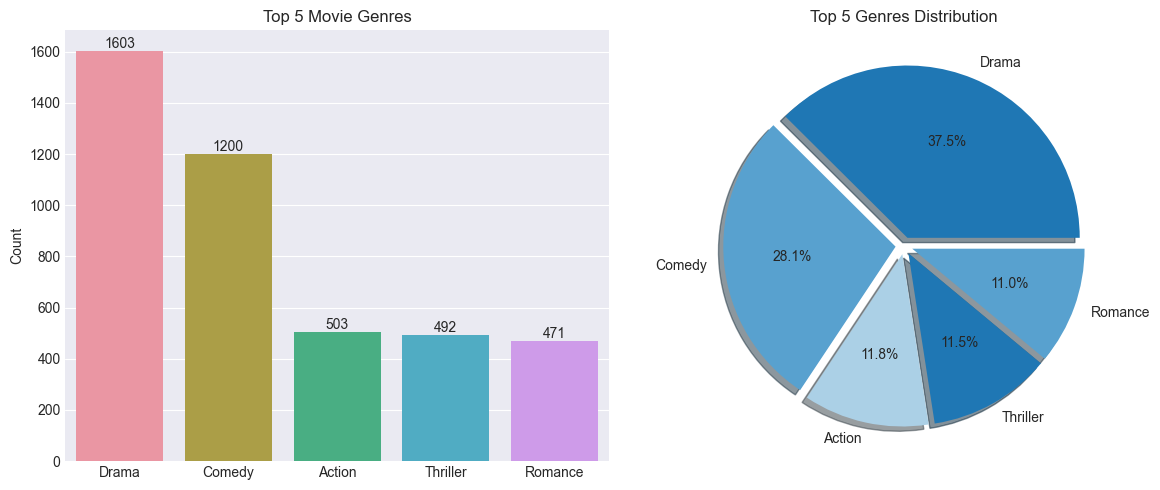

In [40]:
# Extract genres (split by '|') into a flat list
genre_counts = movies['Genres'].str.split('|').explode().value_counts().nlargest(5)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# CountPlot (Bar)
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[0])
axes[0].set_title('Top 5 Movie Genres')
axes[0].set_ylabel('Count')
axes[0].bar_label(axes[0].containers[0])

# Pie chart
axes[1].pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', shadow=True, explode=[0.05]*5)
axes[1].set_title('Top 5 Genres Distribution')

plt.tight_layout()
plt.show()

*explanation* ❎

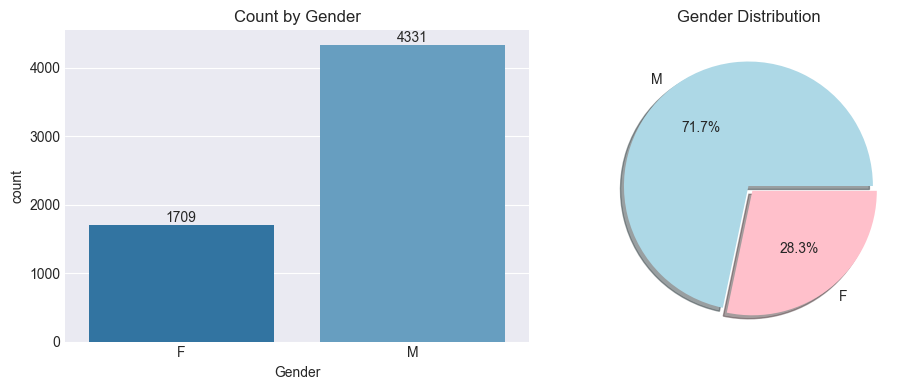

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# CountPlot
sns.countplot(data=users, x='Gender', ax=axes[0])
axes[0].set_title('Count by Gender')
axes[0].bar_label(axes[0].containers[0])

# Pie Chart
gender_counts = users['Gender'].value_counts()
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, colors=['lightblue','pink'], explode=[0,0.05])
axes[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

*explanation* ❎

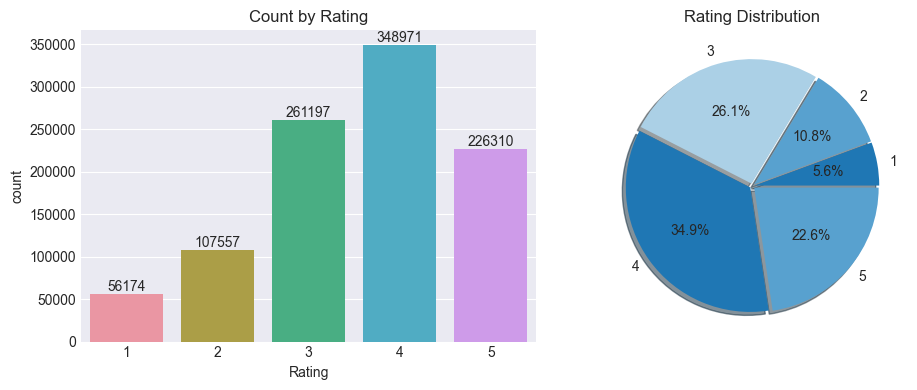

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# CountPlot
sns.countplot(data=ratings, x='Rating', ax=axes[0])
axes[0].set_title('Count by Rating')
axes[0].bar_label(axes[0].containers[0])

# Pie chart
rating_counts = ratings['Rating'].value_counts().sort_index()
axes[1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', shadow=True, explode=[0.02]*len(rating_counts))
axes[1].set_title('Rating Distribution')

plt.tight_layout()
plt.show()

*explanation* ❎

**4.2 Bivariate Analysis** ✔️

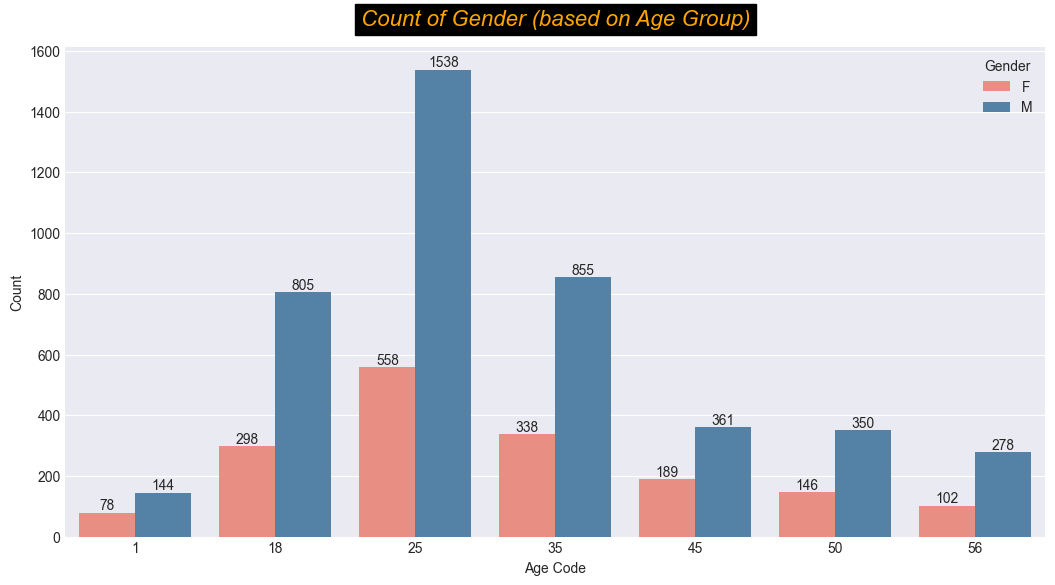

In [43]:
# Define font style
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

# Count of Gender grouped by Age with corrected palette
plt.figure(figsize=(10,5))
ax = sns.countplot(data=users, x='Age', hue='Gender', palette={'M': 'steelblue', 'F': 'salmon'})
for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Gender (based on Age Group)', fontdict=font, pad=15)
plt.xlabel('Age Code')
plt.ylabel('Count')
plt.show()

*explanation* ❎

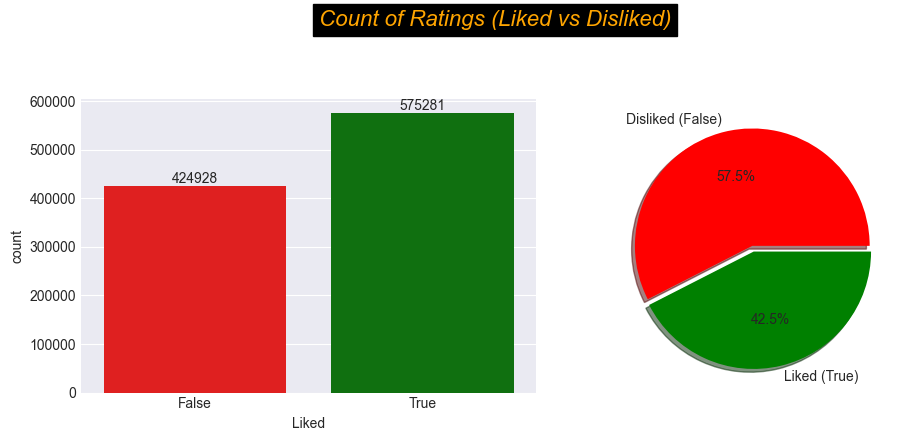

In [44]:
# Count of Liked Ratings
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Countplot
sns.countplot(data=ratings, x='Liked', ax=axes[0], palette={False: 'red', True: 'green'})
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie Chart
slices = ratings.Liked.value_counts().values
labels = ['Disliked (False)', 'Liked (True)']
axes[1].pie(slices, labels=labels, colors=['red', 'green'], shadow=True, explode=[0, 0.05], autopct='%1.1f%%')

plt.suptitle('Count of Ratings (Liked vs Disliked)', y=1.09, fontsize=16, fontstyle='italic',
             backgroundcolor='black', color='orange')
plt.tight_layout()
plt.show()

*explanation* ❎

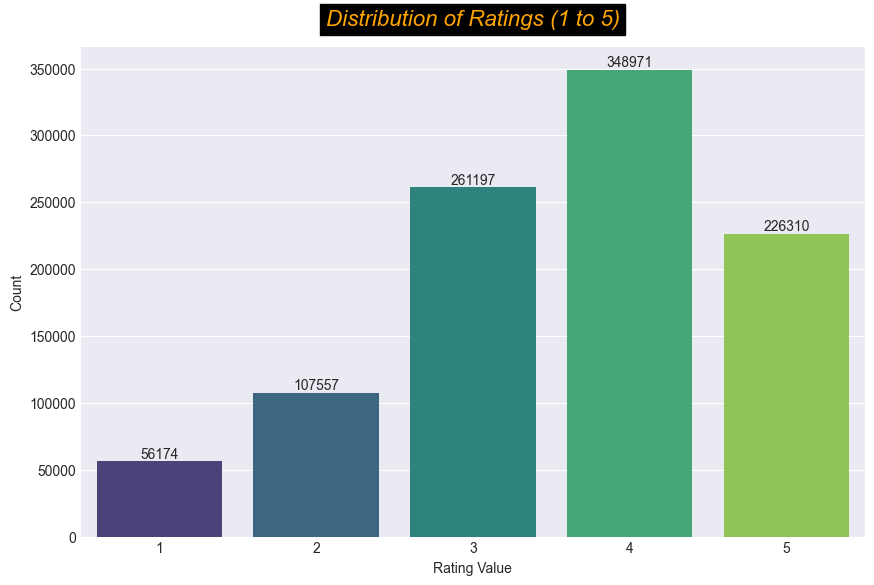

In [45]:
# Countplot of each rating (1–5)
plt.figure(figsize=(8,5))
ax = sns.countplot(data=ratings, x='Rating', palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Ratings (1 to 5)', fontsize=16, fontstyle='italic', backgroundcolor='black', color='orange', pad=15)
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

*explanation* ❎

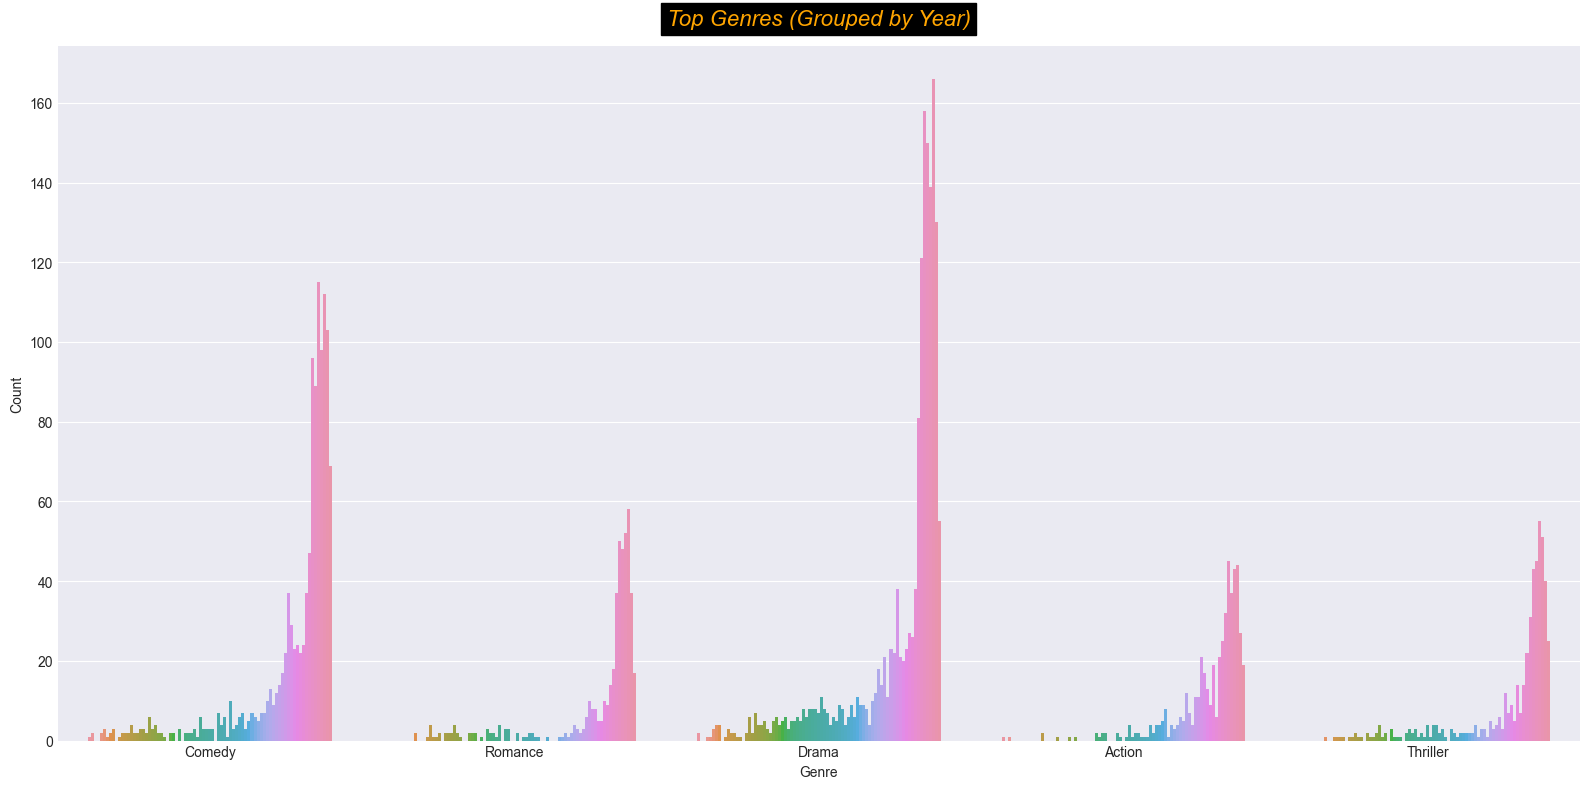

In [46]:
# Extract release year from Title (assumes format like "Movie Name (1999)")
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)').astype(float)

# Flatten genres and keep Year
genre_exploded = movies[['Genres', 'Year']].copy()
genre_exploded['Genres'] = genre_exploded['Genres'].str.split('|')
genre_exploded = genre_exploded.explode('Genres')

# Keep only top 5 genres
top_genres = genre_exploded['Genres'].value_counts().nlargest(5).index
filtered = genre_exploded[genre_exploded['Genres'].isin(top_genres)]

# Convert year to integer and drop NaN
filtered = filtered.dropna(subset=['Year'])
filtered['Year'] = filtered['Year'].astype(int)

# Countplot with larger figure size
plt.figure(figsize=(16,8))  # Increase the figure size here
ax = sns.countplot(data=filtered, x='Genres', hue='Year')
plt.legend([],[], frameon=False)  # Too many years to label by default

# Title and labels
plt.title('Top Genres (Grouped by Year)', fontdict=font, pad=15)
plt.xlabel('Genre')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

*explanation* ❎

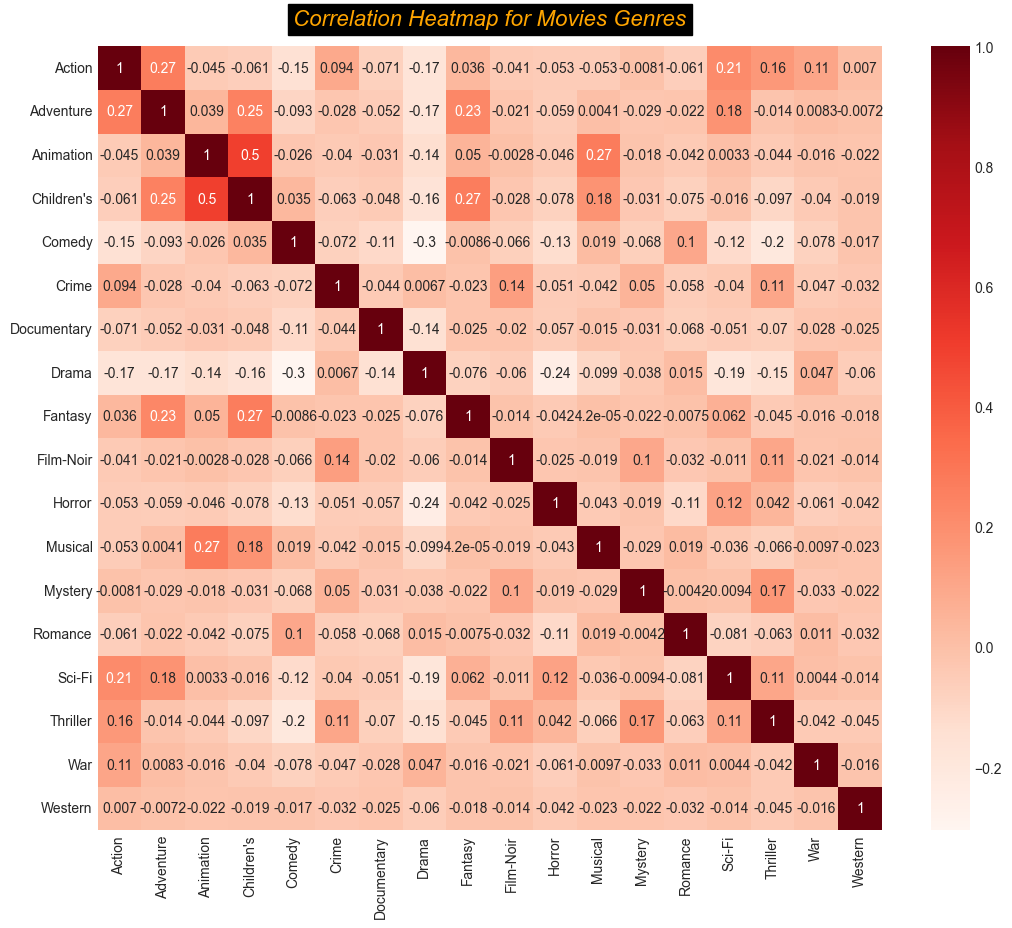

In [47]:
# First, encode categorical columns such as 'Genres' into numeric representation (one-hot encoding)
genre_dummies = movies['Genres'].str.get_dummies('|')

# Now, you can calculate correlation and plot the heatmap
corr_matrix = genre_dummies.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.title('Correlation Heatmap for Movies Genres', fontdict=font, pad=15)
plt.show()

*explanation* ❎

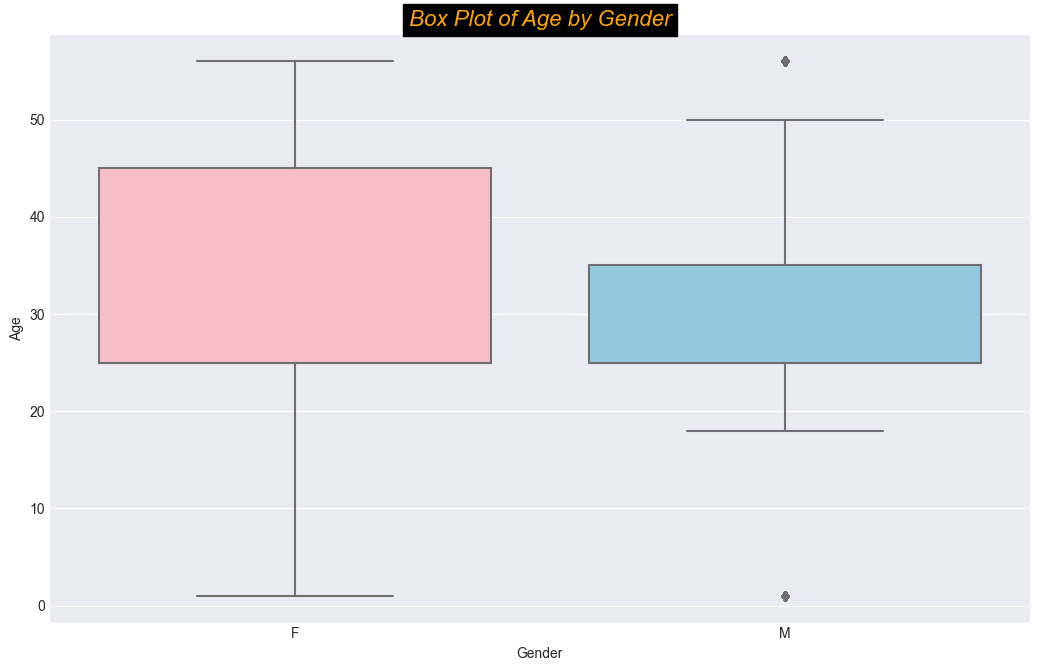

In [48]:
# Set custom color palette
custom_palette = {'M': 'skyblue', 'F': 'lightpink'}

# Create larger figure for better readability
plt.figure(figsize=(10, 6))
sns.boxplot(data=users, x='Gender', y='Age', palette=custom_palette)

# Add title with font styling
plt.title('Box Plot of Age by Gender', fontdict=font)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

*explanation* ❎

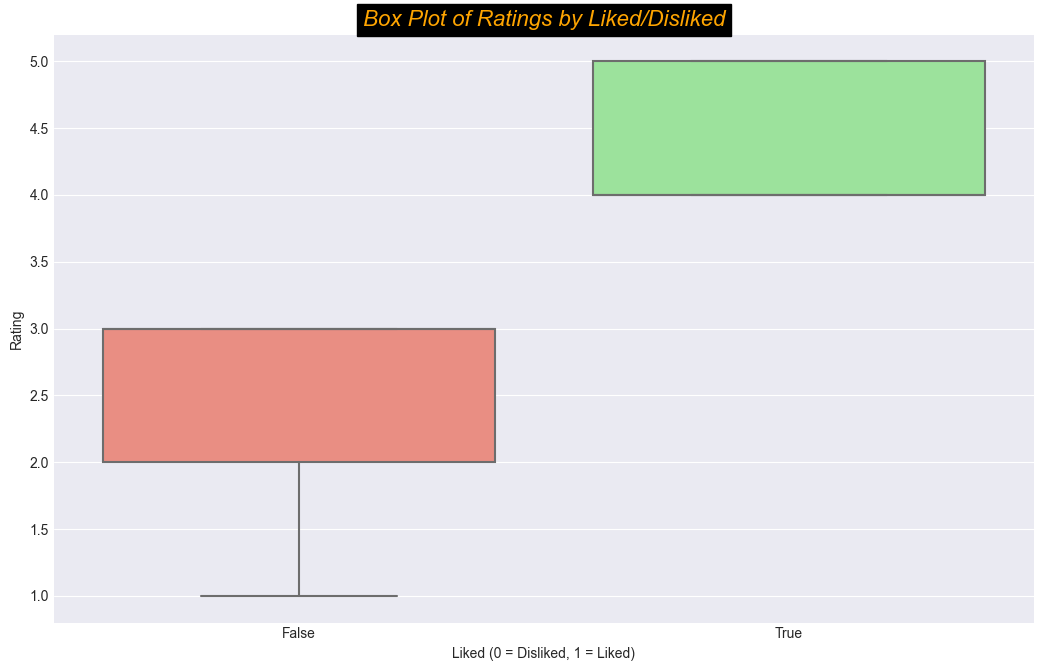

In [49]:
# Set custom color palette
custom_palette = {0: 'salmon', 1: 'lightgreen'}

# Create larger figure for clarity
plt.figure(figsize=(10, 6))
sns.boxplot(data=ratings, x='Liked', y='Rating', palette=custom_palette)

# Add title and axis labels
plt.title('Box Plot of Ratings by Liked/Disliked', fontdict=font)
plt.xlabel('Liked (0 = Disliked, 1 = Liked)')
plt.ylabel('Rating')
plt.show()

*explanation* ❎

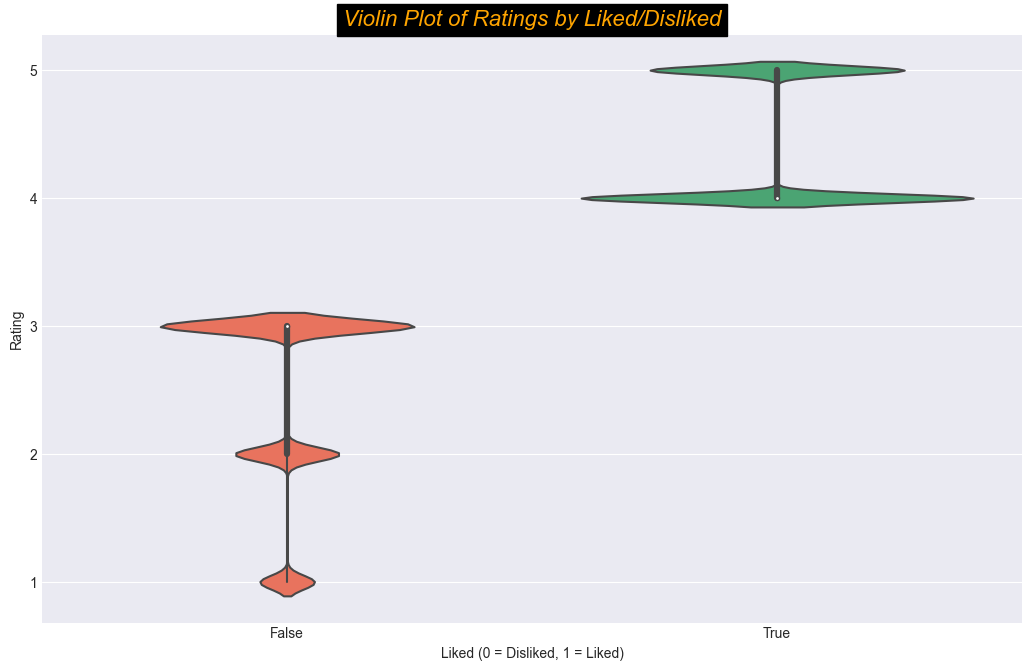

In [50]:
# Violin plot: Rating by Liked
plt.figure(figsize=(10, 6))
sns.violinplot(data=ratings, x='Liked', y='Rating', palette={0: 'tomato', 1: 'mediumseagreen'})
plt.title('Violin Plot of Ratings by Liked/Disliked', fontdict=font)
plt.xlabel('Liked (0 = Disliked, 1 = Liked)')
plt.ylabel('Rating')
plt.show()

*explanation* ❎

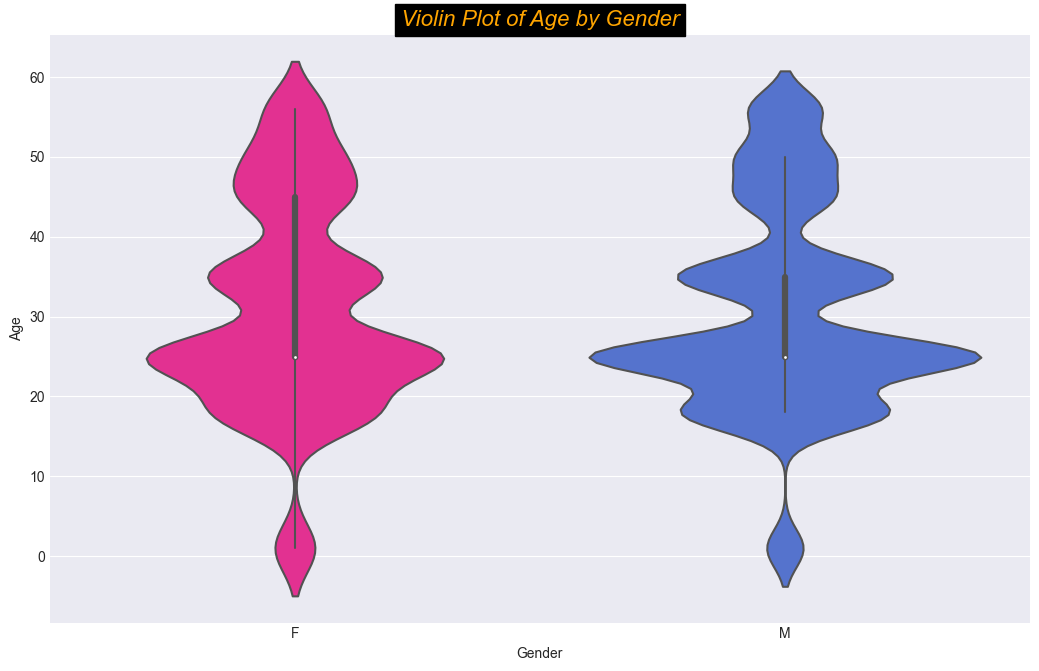

In [51]:
# Violin plot: Age by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=users, x='Gender', y='Age', palette={'M': 'royalblue', 'F': 'deeppink'})
plt.title('Violin Plot of Age by Gender', fontdict=font)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

*explanation* ❎

**4.3 Multivariate Analysis**

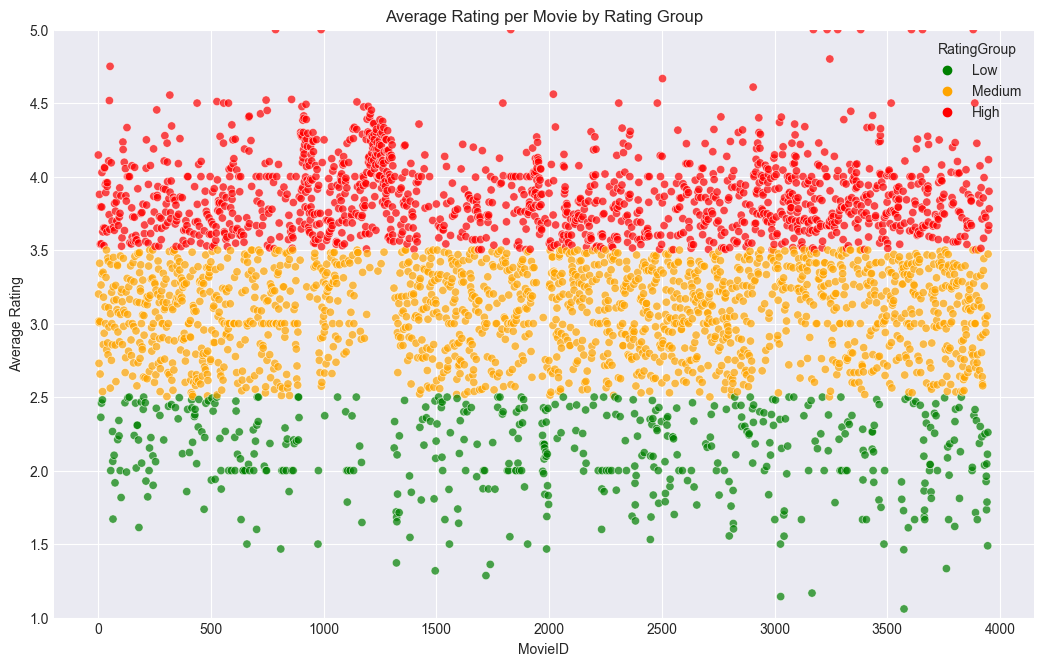

In [64]:
# Bin ratings into groups
movie_avg['RatingGroup'] = pd.cut(movie_avg['Rating'], bins=[1, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_avg, x='MovieID', y='Rating', hue='RatingGroup', palette={'Low': 'green', 'Medium': 'orange', 'High': 'red'}, alpha=0.7)
plt.title('Average Rating per Movie by Rating Group')
plt.xlabel('MovieID')
plt.ylabel('Average Rating')
plt.ylim(1, 5)
plt.show()


In [94]:
# Recreate movie_avg with both average rating and count
movie_avg = ratings.groupby('MovieID')['Rating'].agg(['mean', 'count']).reset_index()
movie_avg.rename(columns={'mean': 'Rating', 'count': 'NumRatings'}, inplace=True)

# Create rating group
movie_avg['RatingGroup'] = pd.cut(movie_avg['Rating'], bins=[1, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High'])


In [ ]:
fig = px.scatter_3d(
    data_frame=movie_avg,
    x='MovieID',
    y='NumRatings',       
    z='Rating',
    color='RatingGroup',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='3D Scatter: MovieID vs Number of Ratings vs Average Rating'
)
pio.show(fig)

In [98]:
# Pivot table: mean Age by Occupation and Gender
user_pivot = pd.pivot_table(data=users, index='Occupation', columns='Gender', values='Age', aggfunc='mean')
user_pivot.style.background_gradient(cmap='coolwarm')


Gender,F,M
Occupation,,
0,30.788793,29.405010
1,35.387560,36.451411
2,33.681319,29.102273
3,33.640000,32.424658
4,20.978632,20.154286
5,30.967742,28.950617
6,37.343137,36.485075
7,33.410072,35.172222
8,47.000000,31.857143
